In [1]:
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import glob

In [2]:
band2R = '/Users/Airton/Desktop/b2sparseless/results/weather/test_latest/images/*real_B.png'
band2F = '/Users/Airton/Desktop/b2sparseless/results/weather/test_latest/images/*fake_B.png'
band6R = '/Users/Airton/Desktop/band6/results_test/weather/test_latest/images/*real_B.png'
band6F = '/Users/Airton/Desktop/band6/results_test/weather/test_latest/images/*fake_B.png'
visR = '/Users/Airton/Desktop/visibility/results_test/weather/test_latest/images/*real_B.png'
visF = '/Users/Airton/Desktop/visibility/results_test/weather/test_latest/images/*fake_B.png'
rhumidR = '/Users/Airton/Desktop/RHumid/results_test/weather/test_latest/images/*real_B.png'
rhumidF = '/Users/Airton/Desktop/RHumid/results_test/weather/test_latest/images/*fake_B.png'
shumidR = '/Users/Airton/Desktop/SHumid/results_test/weather/test_latest/images/*real_B.png'
shumidF = '/Users/Airton/Desktop/SHumid/results_test/weather/test_latest/images/*fake_B.png'
tempR = '/Users/Airton/Desktop/Temp/results_test/weather/test_latest/images/*real_B.png'
tempF = '/Users/Airton/Desktop/Temp/results_test/weather/test_latest/images/*fake_B.png'

In [3]:
MSE = [] 
SSIM =[]

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [4]:
run1R = []
for filename in sorted(glob.glob(shumidR)):
    im=Image.open(filename).convert('L')
    run1R.append(im)

In [5]:
run1F = []
for filename in sorted(glob.glob(shumidF)):
    im=Image.open(filename).convert('L')
    run1F.append(im)

In [6]:
print(len(run1F))
print(len(run1R))

50
50


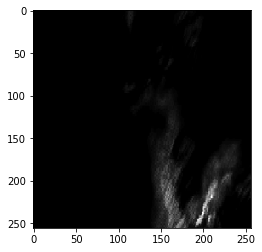

In [7]:
plt.imshow(np.array(run1R[0]),cmap='gray')
plt.show()

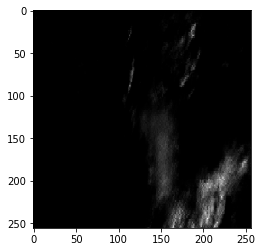

In [8]:
plt.imshow(np.array(run1F[0]),cmap='gray')
plt.show()

In [9]:
MSE = []
SSIM = []
for i in range(len(run1R)):
    m = mse(np.array(run1R[i]),np.array(run1F[i]))
    s = ssim(np.array(run1R[i]),np.array(run1F[i]))
    MSE.append(m)
    SSIM.append(s)

In [10]:
print(MSE)

[219.3994903564453, 234.57667541503906, 184.4294891357422, 110.91993713378906, 249.3197479248047, 196.83641052246094, 63.05043029785156, 319.1618347167969, 158.70579528808594, 337.77679443359375, 137.81651306152344, 198.84866333007812, 277.3874969482422, 443.9618377685547, 90.29496765136719, 137.1503143310547, 327.8537292480469, 229.73226928710938, 102.27241516113281, 344.64862060546875, 247.72769165039062, 210.6437225341797, 308.83421325683594, 208.51226806640625, 97.81312561035156, 188.42202758789062, 253.85586547851562, 237.8007354736328, 295.8694152832031, 213.8312530517578, 63.554840087890625, 178.9418487548828, 69.09938049316406, 157.3092803955078, 130.34962463378906, 69.69195556640625, 130.87290954589844, 177.9891357421875, 363.82537841796875, 110.12356567382812, 129.407958984375, 145.68930053710938, 178.31558227539062, 73.50932312011719, 133.2248992919922, 193.60508728027344, 123.52815246582031, 128.4265899658203, 82.43110656738281, 144.43881225585938]


In [11]:
print(SSIM)

[0.7830676509519823, 0.8478950841732417, 0.8543894420831135, 0.8818140534135602, 0.8901332973668752, 0.8485240516578795, 0.8634506074333848, 0.7667929841747896, 0.7895984625532537, 0.7976921797927677, 0.7983212263224059, 0.8908463973707249, 0.8209172598761334, 0.7587589089024729, 0.919435024724202, 0.8281949079813757, 0.8037462049555801, 0.8534493211993678, 0.8538798204869044, 0.8591707355401176, 0.8388666263224652, 0.8964437514111143, 0.9134304846986957, 0.8930077180783894, 0.9056048150859796, 0.8380380113979105, 0.8467997435509761, 0.7813543953496879, 0.8915298101744307, 0.9150164810423803, 0.9319043695786303, 0.8181359582904806, 0.9209548265352494, 0.8360004365049014, 0.8115874920316558, 0.8422586498207096, 0.8203449364480323, 0.861901429929703, 0.7753006918172877, 0.8441822705991879, 0.8478604697674244, 0.8697250073281519, 0.8455528914991026, 0.8169870153731177, 0.7934610598988727, 0.8432461204699025, 0.8354126569895337, 0.8044651145284826, 0.8340047568235364, 0.8452126422848201]


In [12]:
x=list(range(0,50))

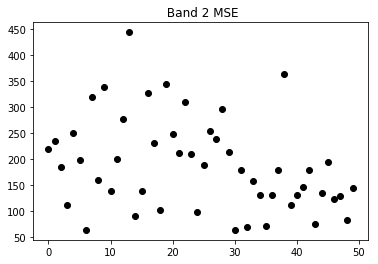

63.05043029785156 443.9618377685547
188.23576965332032


In [13]:
plt.scatter(x,MSE,c='black')
plt.title(" Band 2 MSE")
plt.show()
print(min(MSE),max(MSE))
print(np.mean(MSE))

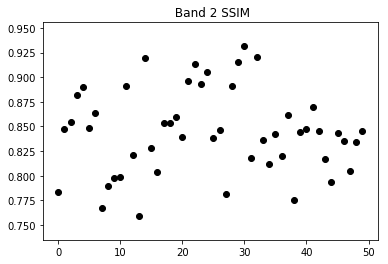

0.7587589089024729 0.9319043695786303
0.844573365091819


In [14]:
plt.scatter(x,SSIM,c='black')
plt.title(" Band 2 SSIM")
plt.show()
print(min(SSIM),max(SSIM))
print(np.mean(SSIM))

In [15]:
from sklearn.metrics import confusion_matrix

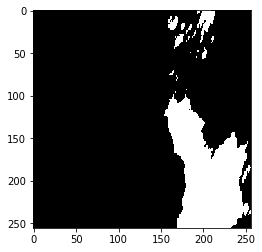

In [16]:
Thr = cv2.threshold(np.array(run1R[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thr[1],cmap = 'gray')
plt.show()

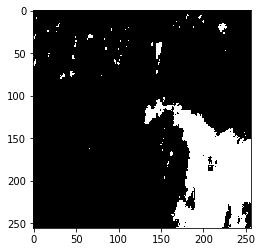

In [17]:
Thf = cv2.threshold(np.array(run1F[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thf[1],cmap = 'gray')
plt.show()

In [18]:
Fthr = []
Fthf = []
for i in range(len(run1R)):
    gray_img= np.array(run1R[i])
    gray_img2= np.array(run1F[i])
    th1 = cv2.threshold(gray_img,1,255,cv2.THRESH_BINARY)
    th2 = cv2.threshold(gray_img2,1,255,cv2.THRESH_BINARY)
    Fr = list(th1[1].flatten())
    Ff = list(th2[1].flatten())
    Fthr.append(Fr)
    Fthf.append(Ff)

In [19]:
TN,FP,FN,TP = 0,0,0,0
TN1,FP1,FN1,TP1 = 0,0,0,0

In [20]:
for i in range(len(Fthr)):
    tn,fp,fn,tp=confusion_matrix(Fthr[i], Fthf[i]).ravel()
    TN = TN +tn
    FP = FP +fp
    FN = FN +fn
    TP = TP +tp

In [21]:
Total = TN+FP+FN+TP
TotalP = FN + TP
TotalN = TN + FP
PTN = (TN/Total)*100
PFP = (FP/Total)*100
PFN = (FN/Total)*100
PTP = (TP/Total)*100
To1 = FN + TN
To2 = TP + FP

In [22]:
PTC = []

In [23]:
PTC.append([PTN,PFP,PFN,PTP])

In [24]:
print(len(PTC))
print(PTC)

1
[[84.097412109375, 6.14276123046875, 4.075531005859375, 5.684295654296875]]


In [25]:
Correct = PTN + PTP
Wrong = PFN + PFP
print("Correct = ", Correct, " Wrong = ", Wrong)

Correct =  89.78170776367188  Wrong =  10.218292236328125


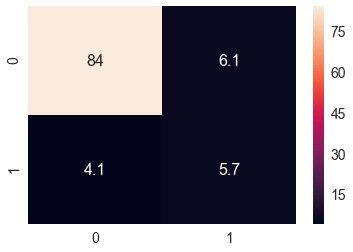

In [26]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[PTN,PFP],
        [PFN,PTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

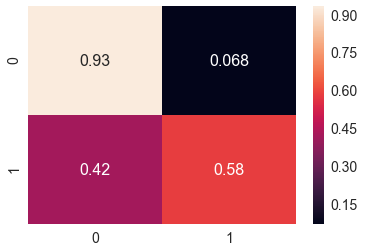

In [27]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TN/TotalN,FP/TotalN],
        [FN/TotalP,TP/TotalP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

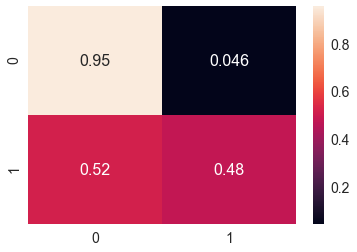

In [28]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TN/To1,FN/To1],
        [FP/To2,TP/To2]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size